### Bike Sharing case study using Multi Linear regression model

### STEPS executed for modelling are mentioned below 
##### Import the file
##### Read and understand the data (Data Validation and Correction)
##### Visualize the data and Transform data  
##### Split the data set in Test and Train 
##### Scaling
##### Build and tune the model 
##### Residual analysis of Training data
##### Make Predictions 
##### Evaluate model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read csv file data
bikingdata = pd.read_csv("C:/Users/Lenovo/OneDrive/Documents/Python Scripts/day.csv")

In [3]:

bikingdata.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# how many rows and cloumns in data set
bikingdata.shape

(730, 16)

In [5]:
# feature level information in df
bikingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikingdata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### STEP 2 Visualize the data set
###### lets observe the relation ship between variables , there are too many but lets see

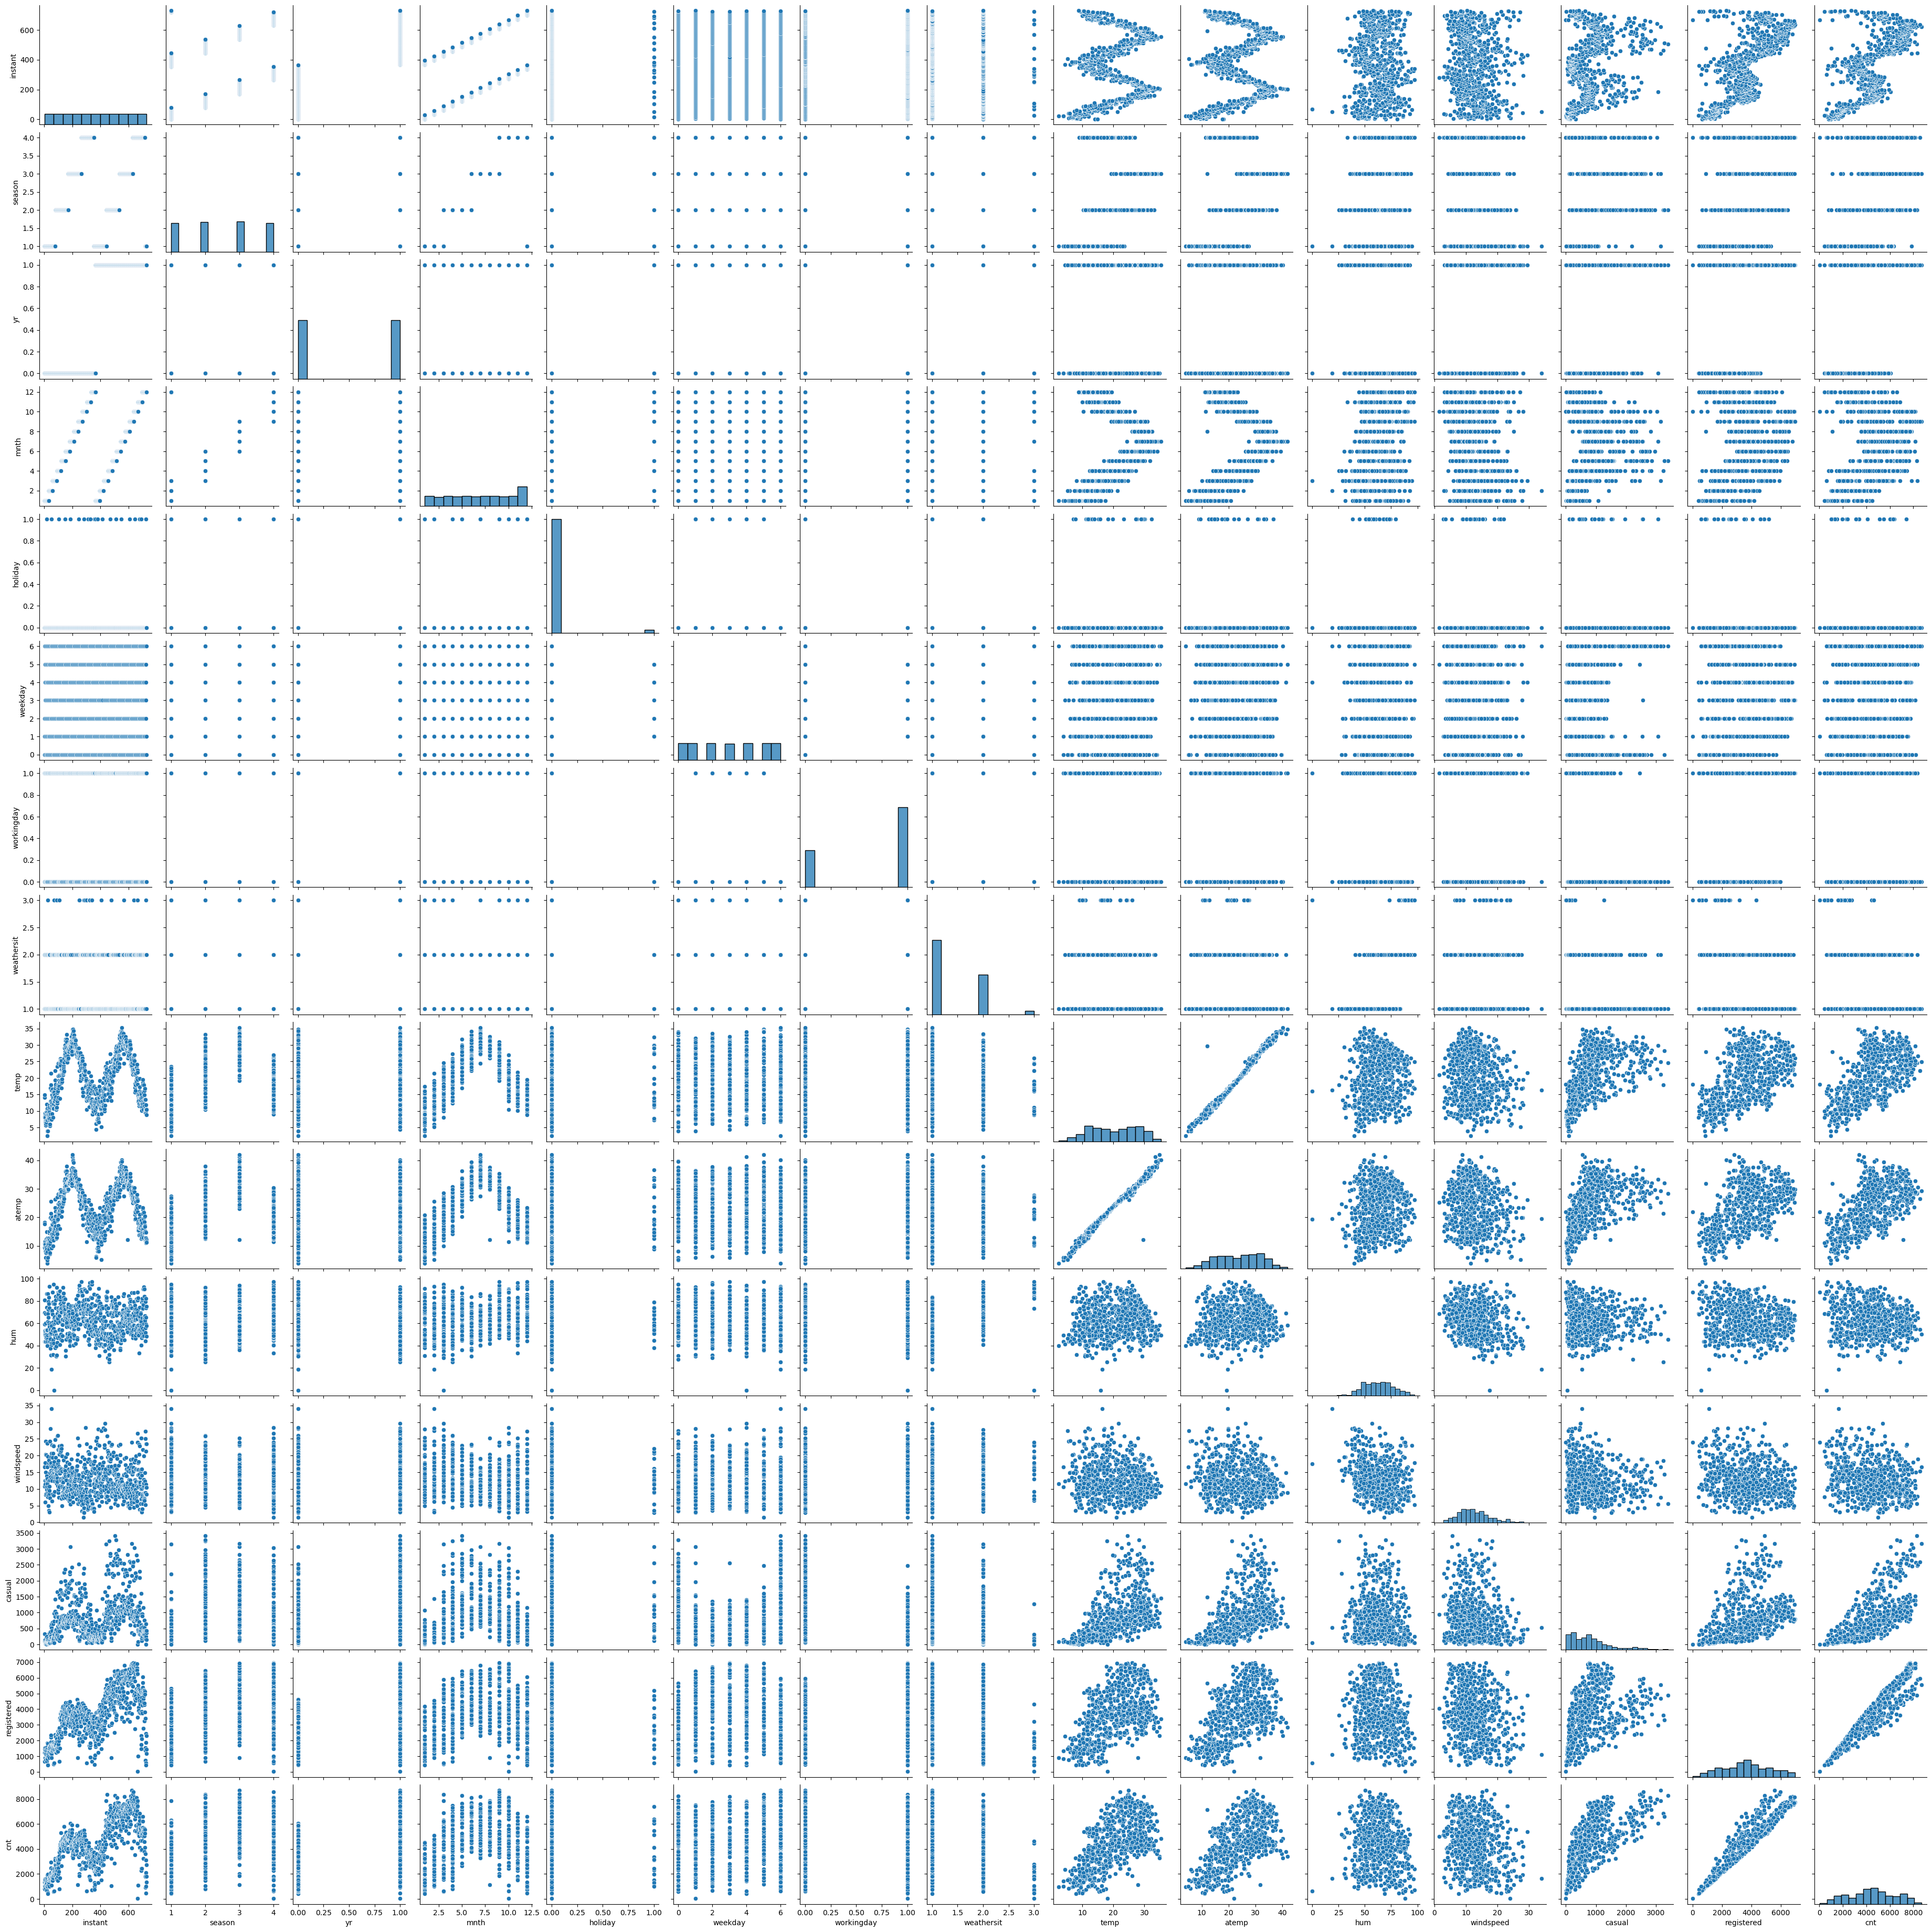

In [7]:
sns.pairplot(bikingdata)
plt.show()

##### Data Prepration 
##### Not much can be infered from above how ever we can see from data that we can drop columns like instant , dteday and regeisterd and casual

In [8]:
# Drop columns or convert them incase they are not having any values

In [9]:
bikingdata.drop(['instant'] ,axis = 1, inplace = True)


In [10]:
bikingdata.drop(['dteday'] ,axis = 1, inplace = True)


In [11]:

#registered and casual are strongly correlated with cnt ther is no point in keeping them for modelling
#as cnt = regsitered+ casual we can create a ratio for them to see the impact later but lets drop for now
bikingdata.drop(['registered','casual'] , axis = 1 , inplace = True)

In [12]:
# visulaize the impact now on data frame
bikingdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Weather sit and season are categorical variables lets convert them 
##### lets create a dummy variable for them 


In [13]:
bikingdata['season']=bikingdata['season'].astype('category')
bikingdata['weathersit']=bikingdata['weathersit'].astype('category')
bikingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    int64   
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(2), float64(4), int64(6)
memory usage: 58.9 KB


In [14]:
#use dummy variables to categorize them
bikingdata = pd.get_dummies(bikingdata, drop_first = True)
#getdummeis returning bool type need to convert all now to int

bikingdata['season_2']=bikingdata['season_2'].astype(np.int64)
bikingdata['season_3']=bikingdata['season_3'].astype(np.int64)
bikingdata['season_4']=bikingdata['season_4'].astype(np.int64)

bikingdata['weathersit_2']=bikingdata['weathersit_2'].astype(np.int64)
bikingdata['weathersit_3']=bikingdata['weathersit_3'].astype(np.int64)
bikingdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   mnth          730 non-null    int64  
 2   holiday       730 non-null    int64  
 3   weekday       730 non-null    int64  
 4   workingday    730 non-null    int64  
 5   temp          730 non-null    float64
 6   atemp         730 non-null    float64
 7   hum           730 non-null    float64
 8   windspeed     730 non-null    float64
 9   cnt           730 non-null    int64  
 10  season_2      730 non-null    int64  
 11  season_3      730 non-null    int64  
 12  season_4      730 non-null    int64  
 13  weathersit_2  730 non-null    int64  
 14  weathersit_3  730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


In [15]:
bikingdata.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


#### Step 4: Splitting the Data into Training and Testing Sets

In [16]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikingdata, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features to bring them to same scale
###### Using MinMaxscaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
# 
#num_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
num_vars =['yr','mnth','holiday','weekday','workingday','temp','atemp','hum' ,'windspeed','cnt','season_2','season_3','season_4','weathersit_2','weathersit_3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [20]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
653,1.0,0.818182,0.0,0.333333,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,0.0,0.0
576,1.0,0.545455,0.0,0.333333,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,1.0,0.0,0.0,0.0
426,1.0,0.181818,0.0,1.000000,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0.0,0.0,0.0,1.0,0.0
728,1.0,1.000000,0.0,0.000000,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0.0,0.0,0.0,0.0,0.0
482,1.0,0.272727,0.0,1.000000,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,1.0,0.0,0.0,1.0,0.0


In [21]:
df_train.describe()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    float64
 1   mnth          510 non-null    float64
 2   holiday       510 non-null    float64
 3   weekday       510 non-null    float64
 4   workingday    510 non-null    float64
 5   temp          510 non-null    float64
 6   atemp         510 non-null    float64
 7   hum           510 non-null    float64
 8   windspeed     510 non-null    float64
 9   cnt           510 non-null    float64
 10  season_2      510 non-null    float64
 11  season_3      510 non-null    float64
 12  season_4      510 non-null    float64
 13  weathersit_2  510 non-null    float64
 14  weathersit_3  510 non-null    float64
dtypes: float64(15)
memory usage: 63.8 KB


In [23]:
df_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

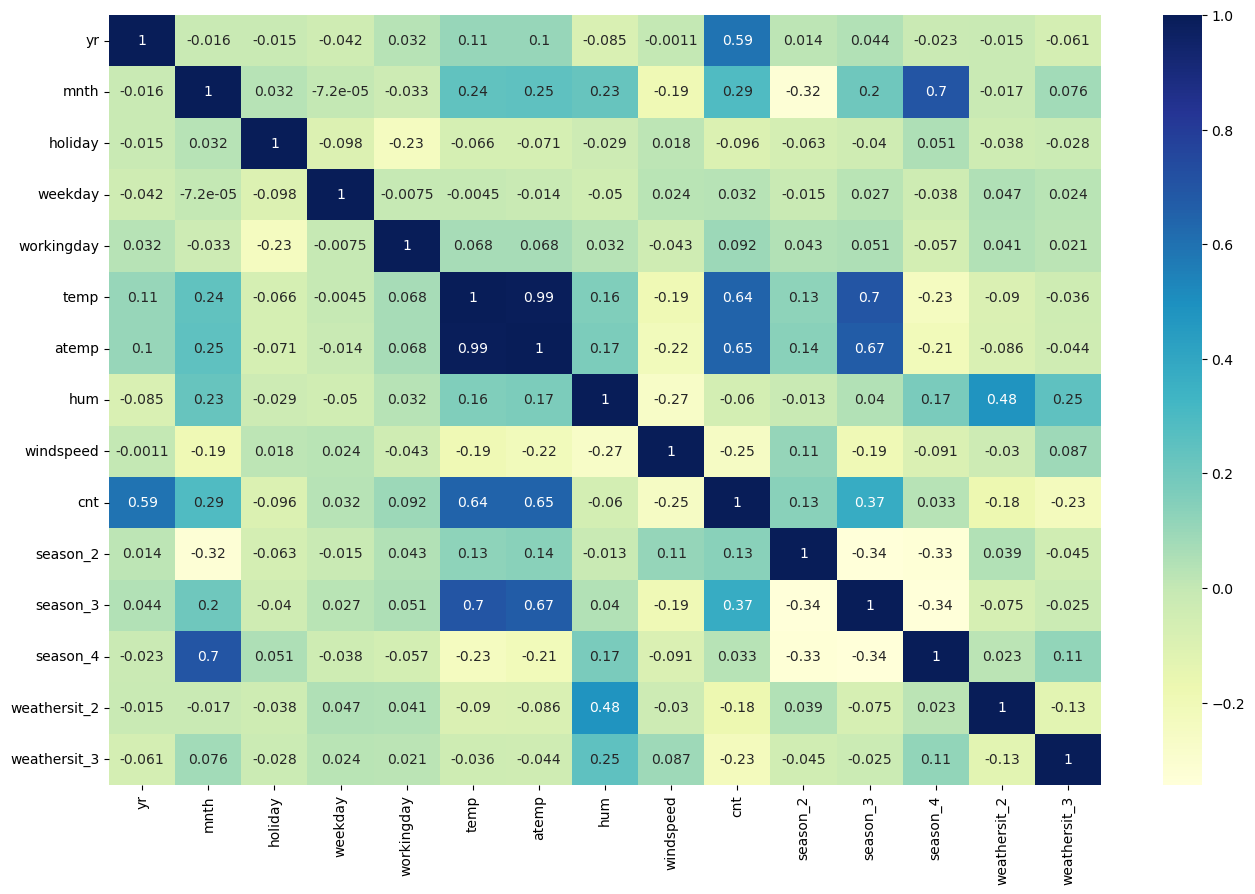

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### From above we can infer that cnt has strong correlation with temp and atemp 

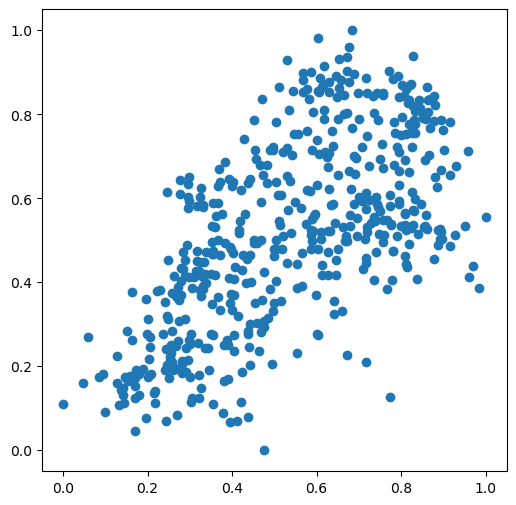

In [25]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

##### Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Step 5: Building a linear model

In [27]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [28]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

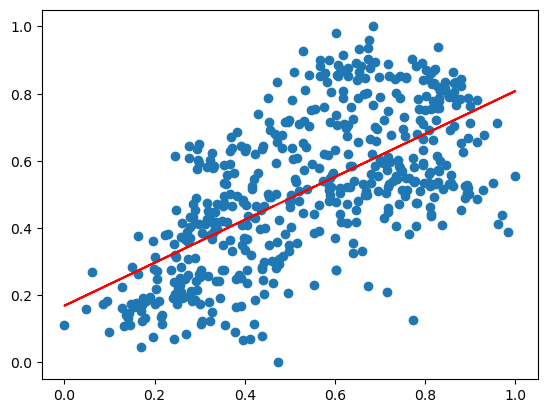

In [29]:
# visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.639*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [30]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           5.80e-61
Time:                        22:37:41   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

##### Adding another variable
##### The R-squared value obtained is 0.414. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. temp and atemp

In [31]:
# Assign more feature variables to X
X_train_lm = X_train[['atemp', 'temp']]

In [32]:
# Again Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [33]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.95e-60
Time:                        22:39:16   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Adding all variables
###### The R-squared value obtained is 0.41 still. Since we have so many variables,so lets all and see the impact

In [34]:
bikingdata.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [35]:

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           0.169959
yr              0.232160
mnth            0.012586
holiday        -0.064151
weekday         0.048562
workingday      0.018820
temp            0.435309
atemp           0.060468
hum            -0.126044
windspeed      -0.178078
season_2        0.115841
season_3        0.070159
season_4        0.155594
weathersit_2   -0.058190
weathersit_3   -0.247813
dtype: float64

In [36]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.69e-182
Time:                        22:40:12   Log-Likelihood:                 496.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     495   BIC:                            -898.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1700      0.030      5.725   

###### R^2 is now improved how ever P values for many features are high so we will have to check the VIF as well 

In [38]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,386.50
6,atemp,364.92
7,hum,17.92
1,mnth,13.87
10,season_3,8.23
11,season_4,7.20
8,windspeed,3.97
9,season_2,3.52
4,workingday,3.14
3,weekday,3.03


###### Extremely high VIF for certain variables hence we need to drop them 1 by 1 

In [40]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('hum' ,axis = 1, inplace = True)
#X = X_train.drop('weathersit_1' ,axis = 1, inplace = True)
#X = X_train.drop('weathersit_2' ,axis = 1, inplace = True)
X = X_train.drop('season_3' ,axis = 1, inplace = True)

In [41]:
# Build a third fitted model
import statsmodels.api as sm
X_train_lm2 = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

lr_2.params

const           0.082443
yr              0.234153
mnth            0.044502
holiday        -0.067407
weekday         0.051852
workingday      0.019663
temp            0.561308
atemp          -0.015376
windspeed      -0.162678
season_2        0.079442
season_4        0.105891
weathersit_2   -0.077894
weathersit_3   -0.279544
dtype: float64

In [42]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          5.28e-180
Time:                        22:42:16   Log-Likelihood:                 484.58
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     497   BIC:                            -888.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0824      0.020      4.177   

In [43]:
# Check for the VIF values of the feature variables again . 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,354.23
6,atemp,349.14
1,mnth,10.94
9,season_4,3.97
7,windspeed,3.49
4,workingday,2.95
3,weekday,2.90
0,yr,2.02
8,season_2,1.60
10,weathersit_2,1.52


In [45]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('atemp' ,axis = 1, inplace = True)

In [46]:
# Build a furth fitted model
import statsmodels.api as sm
X_train_lm3 = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()

lr_3.params

const           0.082056
yr              0.234171
mnth            0.044621
holiday        -0.067290
weekday         0.051926
workingday      0.019671
temp            0.546971
windspeed      -0.162101
season_2        0.079282
season_4        0.105637
weathersit_2   -0.077892
weathersit_3   -0.279389
dtype: float64

In [47]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.54e-181
Time:                        22:42:50   Log-Likelihood:                 484.57
No. Observations:                 510   AIC:                            -945.1
Df Residuals:                     498   BIC:                            -894.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0821      0.019      4.233   

In [48]:
# Check for the VIF values of the feature variables again . 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,10.93
5,temp,8.98
8,season_4,3.86
6,windspeed,3.44
4,workingday,2.94
3,weekday,2.90
0,yr,2.02
7,season_2,1.56
9,weathersit_2,1.52
10,weathersit_3,1.08


In [50]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('mnth' ,axis = 1, inplace = True)


In [51]:
# Build a fifth fitted model
import statsmodels.api as sm
X_train_lm4 = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm4).fit()

lr_4.params

const           0.085751
yr              0.232992
holiday        -0.065957
weekday         0.053110
workingday      0.019358
temp            0.574008
windspeed      -0.164323
season_2        0.075195
season_4        0.130153
weathersit_2   -0.077651
weathersit_3   -0.279331
dtype: float64

In [53]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.36e-181
Time:                        22:43:21   Log-Likelihood:                 482.72
No. Observations:                 510   AIC:                            -943.4
Df Residuals:                     499   BIC:                            -896.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0858      0.019      4.435   

In [54]:
# Check for the VIF values of the feature variables again . 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,4.39
5,windspeed,3.43
3,workingday,2.94
2,weekday,2.88
0,yr,2.01
8,weathersit_2,1.52
6,season_2,1.50
7,season_4,1.40
9,weathersit_3,1.08
1,holiday,1.07


###### As we can see now the VIF and P values both are within limits this model can be taken fwd for predictions

##### STEP 6 Residual Analysis of the train data

In [57]:
y_train_price = lr_4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

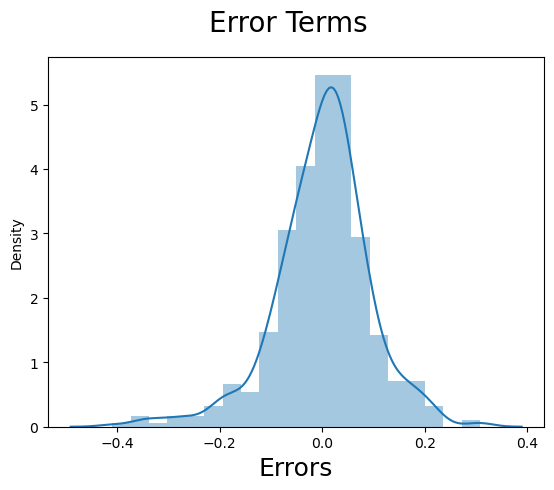

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [69]:
### Error terms are normally disributed (assumption validated)

##### Making Predictions Using the Final Model

In [59]:
#num_vars2 =['yr','mnth','holiday','weekday','workingday','temp','atemp','hum' ,'windspeed','cnt','season_2','season_3','season_4','weathersit_2','weathersit_3']
num_vars3 =['yr','holiday','weekday','workingday','temp','hum' ,'windspeed','cnt','season_2','season_4','weathersit_2','weathersit_3']
df_test[num_vars3] = scaler.fit_transform(df_test[num_vars3])

In [60]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,0.503044,0.698630,0.546312,24.255828,0.508750,0.418870,0.516216,0.264840,0.246575,0.232877,0.319635,0.027397
std,0.500722,3.421875,0.188034,0.331402,0.459904,0.249189,8.299641,0.201253,0.188111,0.238702,0.442259,0.432005,0.423633,0.467403,0.163612
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.166667,0.000000,0.328479,17.085500,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,0.500000,1.000000,0.546045,24.873150,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,0.833333,1.000000,0.759735,31.155725,0.651165,0.524362,0.682487,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
col1=X_train.columns
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
X_test_m4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    float64
 2   holiday       219 non-null    float64
 3   weekday       219 non-null    float64
 4   workingday    219 non-null    float64
 5   temp          219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    float64
 8   season_4      219 non-null    float64
 9   weathersit_2  219 non-null    float64
 10  weathersit_3  219 non-null    float64
dtypes: float64(11)
memory usage: 20.5 KB


In [63]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.36e-181
Time:                        22:47:07   Log-Likelihood:                 482.72
No. Observations:                 510   AIC:                            -943.4
Df Residuals:                     499   BIC:                            -896.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0858      0.019      4.435   

#### Step 9: Model Evaluation

In [64]:
y_pred_m4 = lr_4.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

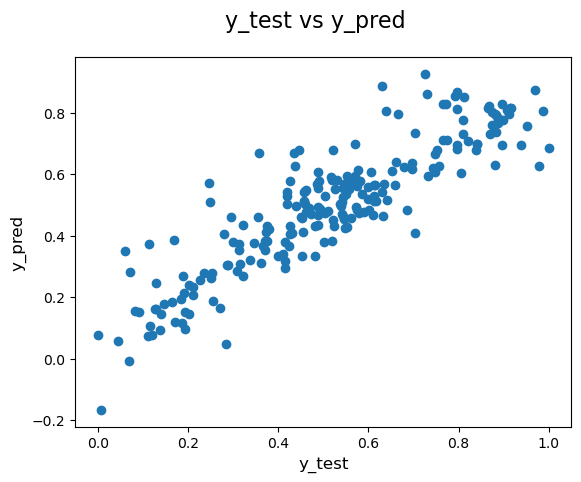

In [65]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 16)              # Plot heading 
plt.xlabel('y_test', fontsize = 12)                          # X-label
plt.ylabel('y_pred', fontsize = 12)  

###### The predicted values have linear relationship with the actual values

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7816313997732032

###### Adjusted R^2 Value for TEST

In [67]:
r2=0.7816313997732032

In [68]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7711329093776841

######## Final results

##### Train data R^2 = 0.825
#### Train data Adj R^2 = 0.821
##### TEST R^2 = 0.7816313997732032
##### TEST Adj R^2 = 0.7711329093776841
###### So seems like a fine tuned model that can be generalized as training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.

###### Conclusions
###### Variables that impact the Bike sharing models are 
###### -- Temp , weather_sit , and year 
###### Temperature (coefficient of approx. 0.57) , Year (coeff of +0.23) and weather_sit3(coeff of -0.28)
